In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score

In [3]:
# r2 index order [split,scaling,component,stat]
# split = interp or extrap
# scaling = stats, global, local
# component = tau11,tau12,...tau33
# stat = mean, std. dev.

r2=np.array([
    #Interp
    [
        #Stats
        [[0.8267483058487599 , 0.0020807897536982],
            [0.6712512971479064 , 0.011981303806248197],
            [0.6970869479187196 , 0.003204792411436137],
            [0.6336586633041212 , 0.010538925474942798],
            [0.6286799688946434 , 0.006958294580995121],
            [0.41483359589680086 , 0.031248516988983913]],
        #Global
        [[0.9324134284140759 , 0.010162223948418198],
            [0.6629959773052574 , 0.008757593653216158],
            [0.7100289515070277 , 0.0036098262860696363],
            [0.6665429629564592 , 0.016110508826808156],
            [0.6299061046733134 , 0.006373516416053913],
            [0.4680263268374037 , 0.03857824615271172]],
        #Local
        [[0.9454220387681316 , 0.004887483882113834],
            [0.6523415830702468 , 0.03634888426197143],
            [0.7777705432084996 , 0.0015786128108428762],
            [0.7360976399182189 , 0.005087351342019656],
            [0.69698695736617 , 0.0021744942927336744],
            [0.490212666772992 , 0.012484750154106177]]
    ],
     #Extrap
    [
        #Stats
        [[0.8279917300924758 , 0.03967704220437187],
            [0.5349060833860897 , 0.05802784683858494],
            [0.49521713936790696 , 0.022160562151067445],
            [0.6764038376802283 , 0.06817356306017577],
            [0.4908224695131603 , 0.018512540201453712],
            [0.6537200243331183 , 0.019266909057857932]],
        #Global
        [[0.8907022928790085 , 0.019769734555974083],
            [0.7675646180365099 , 0.03974054232837617],
            [0.5362705347071769 , 0.0070718700881562445],
            [0.7951852509770819 , 0.03710481303179848],
            [0.5153426552656457 , 0.014345947103597507],
            [0.5791333453391533 , 0.0407116933898783]],
        #Local
        [[0.8227973671890796 , 0.017090352762499258],
            [0.908687923551976 , 0.0039172663011595435],
            [0.5644522140356075 , 0.006556349477657119],
            [0.8446380412439105 , 0.004719311170262712],
            [0.5470931271513744 , 0.00272625822971738],
            [0.35578301830325854 , 0.01178240824147408]]
    ]       
])

In [4]:
r2.shape

(2, 3, 6, 2)

In [5]:
# r2 index order [split,scaling,component,stat]
# split = interp or extrap
# scaling = stats, global, local
# component = tau11,tau12,...tau33
# stat = mean, std. dev.

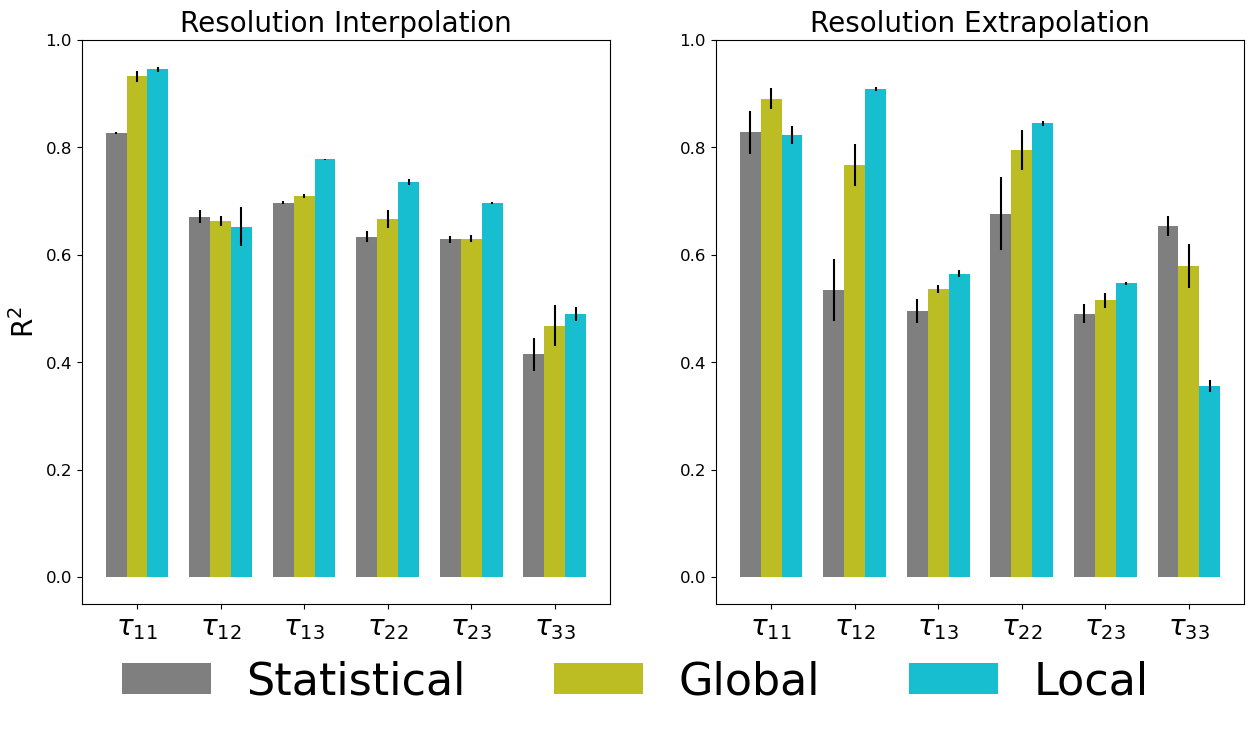

In [6]:
fs=20
ls=12

width = 1  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(1,2,figsize=(15,8))

ncomponent=r2.shape[-2]
component_text = [r'$\tau_{11}$', r'$\tau_{12}$', r'$\tau_{13}$', r'$\tau_{22}$', r'$\tau_{23}$', r'$\tau_{33}$']
nscaling = r2.shape[-3]
scaling_text = ['Statistical','Global','Local']
colors = ['tab:gray','tab:olive','tab:cyan']
x=np.arange(0,(nscaling+1)*ncomponent,nscaling+1)
offset=[-1,0,1]
task_text=['Resolution Interpolation','Resolution Extrapolation']

for itask in range(len(task_text)):
    for iscaling in range(nscaling):
        rects = ax[itask].bar(x + offset[iscaling], r2[itask,iscaling,:,0], width, label=scaling_text[iscaling], color=colors[iscaling])
        bars = ax[itask].errorbar(x + offset[iscaling], r2[itask,iscaling,:,0], yerr=r2[itask,iscaling,:,1], linestyle=' ', color='k')
        ax[itask].set_ylim(-.05, 1)
        ax[itask].set_xticks([])
        ax[itask].set_xticks(x, component_text,fontsize=fs) 
        ax[itask].set_title(task_text[itask],fontsize=fs)
        ax[itask].tick_params(axis='y',labelsize=ls)
#             ax[itask].legend(fontsize=32)
ax[0].set_ylabel(r'R$^2$',fontsize=fs)
       

#ax[1,1].legend(ncol=3,fontsize=32,loc='lower right')
fig.subplots_adjust(bottom=0.175)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles,labels, loc='lower left', bbox_to_anchor=(0.125, 0.001),fontsize=32,ncol=3,frameon=False,framealpha=0)

fmt="eps"
plt.savefig('ResolutionStats.'+fmt,format=fmt)#,transparent=True)